# Introduction

## Overview
The study aims to analyze the patterns, disparities, and media representation of jail deaths in the United States. Using various visualizations, including line graphs, pie charts, and bar charts, the study examines the temporal trends, demographic breakdowns, causes, and geographic distribution of jail deaths. Additionally, the study explores the common themes and narratives in media coverage of these deaths. By integrating quantitative data analysis with qualitative text analysis, the study provides a comprehensive understanding of jail deaths and their portrayal in the media.

## Research Question
The research topic explores Jail Deaths in the United States, particularly this question:
**What are the key patterns and disparities in jail deaths in the United States, and how are these deaths represented in media coverage?**

## Motivation
As someone deeply invested in technology for social good, I am motivated by the potential of this study to make a real-world impact. The issue of jail deaths is not just a statistical concern; it touches on human rights, social justice, and the need for systemic reform. By bringing to light the patterns and disparities in jail deaths, I hope to contribute to efforts aimed at protecting the most vulnerable in our society. Furthermore, examining media coverage of these deaths can help ensure that public discourse is informed by accurate data, leading to more compassionate and effective policies.

## Sources
* All the data visualizations come from the following [dataset](https://www.reuters.com/investigates/special-report/usa-jails-graphic/), provided by Reuters, which contains data from 523 jails spanning the years from 2008 to 2019.
* [Prison Health Care Crisis Mounts as Incarcerated Population Ages](https://eji.org/news/prison-health-care-crisis-mounts-as-incarcerated-population-ages/#:~:text=State%20and%20federal%20prisons%20have,is%20already%20failing%2C%20Vox%20reports) by the Equal Justice Initiative provides information on medical care in prisons.

# Data and Analysis
## Number of Deaths Per Year

In order to begin answering this question, it is important to explore trends in jail deaths. Using the dataset provided in sources, we can determine the number of annual deaths to help form conclusions.

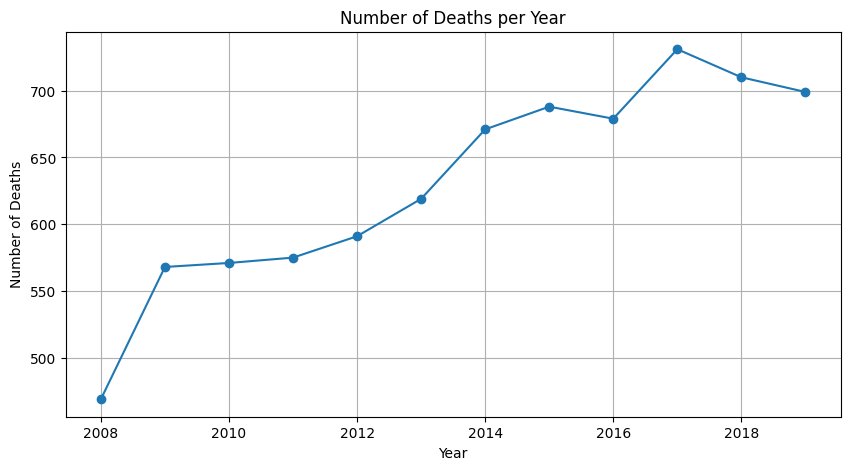

In [266]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '~/Documents/college/dgt-hum-140/jail_deaths.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per Year')
plt.grid(True)
plt.show()

The line graph above illustrates the annual number of jail deaths in the United States from 2008 to 2019. The x-axis represents the years, while the y-axis shows the number of deaths. Each point on the line indicates the number of deaths in a specific year, and the line connects these points to show the trend over time.

The graph indicates an upward trend in the number of jail deaths from 2008 to 2018, going from 460 in 2008 to 700 in 2018, with the peak reaching 740 in 2017. This demonstrates a 52% increase in jail deaths. There was a steep increase in deaths from 2008 to 2009, followed by a more gradual increase in subsequent years.

The upward trend highlights a significant increase in jail deaths over the decade, raising concerns about the factors contributing to this rise. Keep this in mind as we explore further.

## Cause of Death
There are a lot of reasons why jail deaths may occur, and knowing what happened may help us recognize trends that are forming in relation to these deaths.

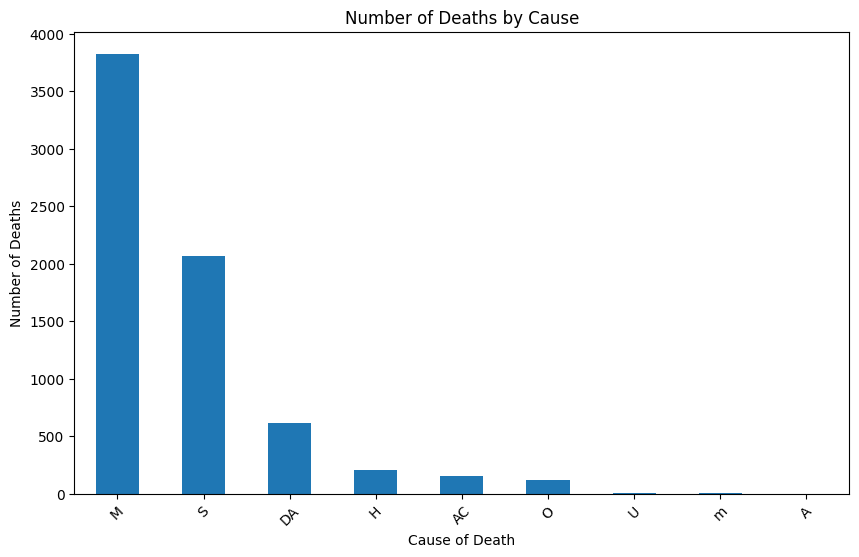

In [267]:
cause_counts = df['cause_short'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cause_counts.plot(kind='bar')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Cause')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the total number of deaths categorized by the cause of death, using the following abbreviations:
* Medical
* Suicide
* Drug or Alcohol
* Homicide
* Accident
* Cannot be determined

The leading cause of death in jails is medical, with nearly 4,000 deaths. This indicates that a significant proportion of jail deaths are related to health issues, suggesting potential gaps in medical care or pre-existing health conditions among inmates.

Suicide is the second leading cause of death, with over 2,000 deaths. This highlights mental health concerns and the potential lack of adequate mental health support and suicide prevention measures in jails.

About 1 in 10 deaths occur due to drug and alcohol, suggesting substance abuse issues among the incarcerated population and the need for effective substance abuse treatment programs.

Homicides and accidents account for fewer deaths but are still significant. This points to safety and violence issues within jails. A small number of deaths are undetermined, indicating that some cases lack clear conclusions, which may warrant further investigation.

In order to delve more into the trends of increases in deaths over the years, as well as cause of death, we can combine both to visualize more similarities.

<Figure size 1200x800 with 0 Axes>

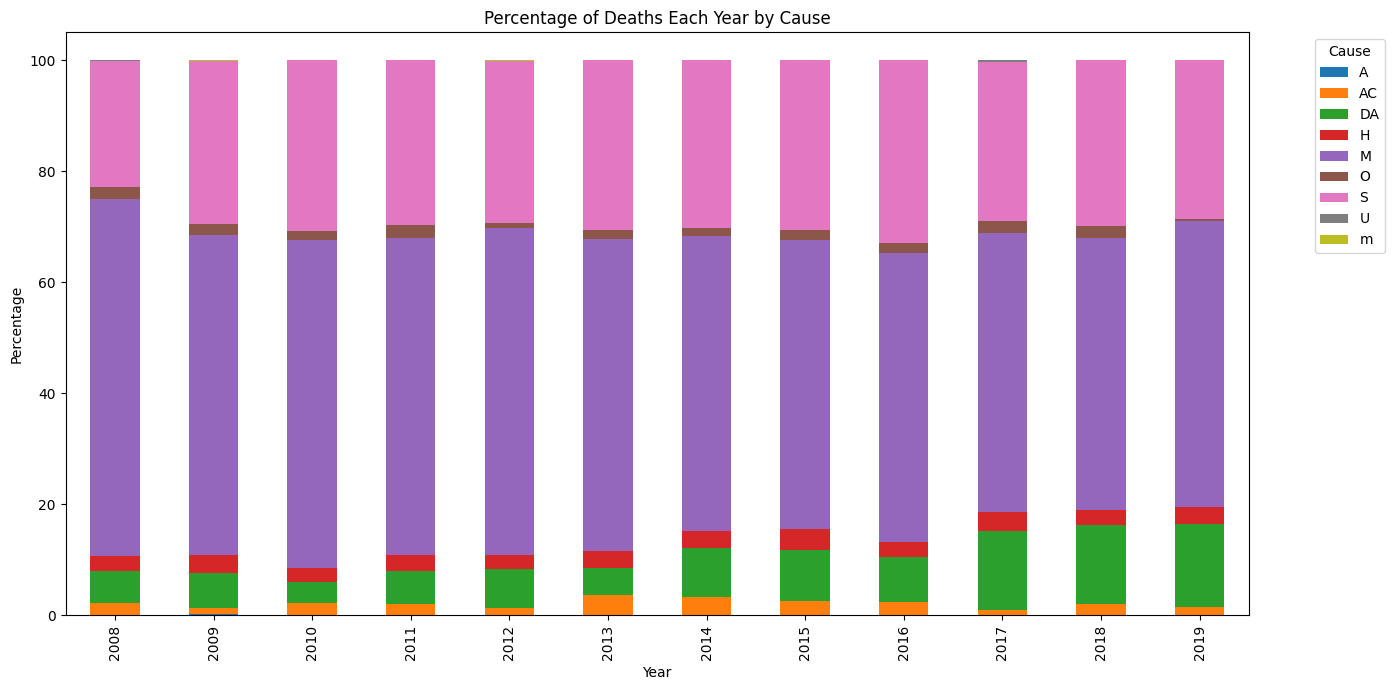

In [268]:
cause_year_counts = df.groupby(['year', 'cause_short']).size().unstack(fill_value=0)
total_deaths_per_year = cause_year_counts.sum(axis=1)
percentage_cause_year = cause_year_counts.divide(total_deaths_per_year, axis=0) * 100
plt.figure(figsize=(12, 8))
percentage_cause_year.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Percentage of Deaths Each Year by Cause')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This stacked bar chart displays the percentage distribution of deaths each year by cause. The years span from 2008 to 2019, and each bar is segmented by the proportion of deaths attributed to each cause.

Over the years, medical causes (M) consistently dominate the causes of death, though the percentage fluctuates and it is slightly decreasing over the years. Suicides (S) have a noticeable presence each year, with some variation in their proportion of total deaths. In more recent years, there appears to be a slight increase in deaths by drug and alcohol.

The analysis of these charts in relation to the research question reveals significant patterns and disparities in the causes of jail deaths in the United States. Medical issues and suicide are the predominant causes, highlighting the critical need for improved healthcare and mental health support in jails. The Equal Justice Initiative (link cited in sources) describes the medical care in prisons as severely inadequate, contributing to preventable and premature deaths among the incarcerated. The aging prison population exacerbates this crisis, with older inmates experiencing high morbidity rates and signs of cognitive decline earlier than their non-incarcerated counterparts. This systemic neglect, driven by a focus on punishment over rehabilitation, underscores the urgent need for reforms and more humane approaches to managing older prisoners.

The variability in other causes over the years suggests that external factors and policy changes may influence these deaths, warranting further investigation. Understanding these patterns can inform better policy-making and targeted interventions to reduce jail deaths and improve inmate welfare.

## Deaths by Gender
In order to get more information on significant patterns and disparities in jail deaths, we can explore the deaths in relation to gender.

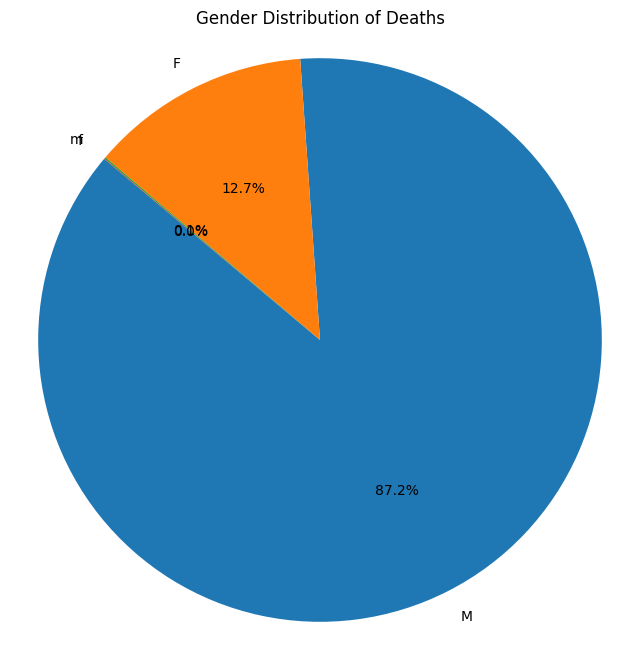

In [269]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Deaths')
plt.axis('equal')
plt.show()

The pie chart above shows that an overwhelming majority of jail deaths occur among men (87.2%), with women accounting for 12.7% of the deaths. Women make up 6.4% of individuals in jail, yet they make almost 12.7% of the deaths in jails, double the death rate compared to occupancy. Let us delve mor e into the causes to help with any conclusions.

<Figure size 1400x800 with 0 Axes>

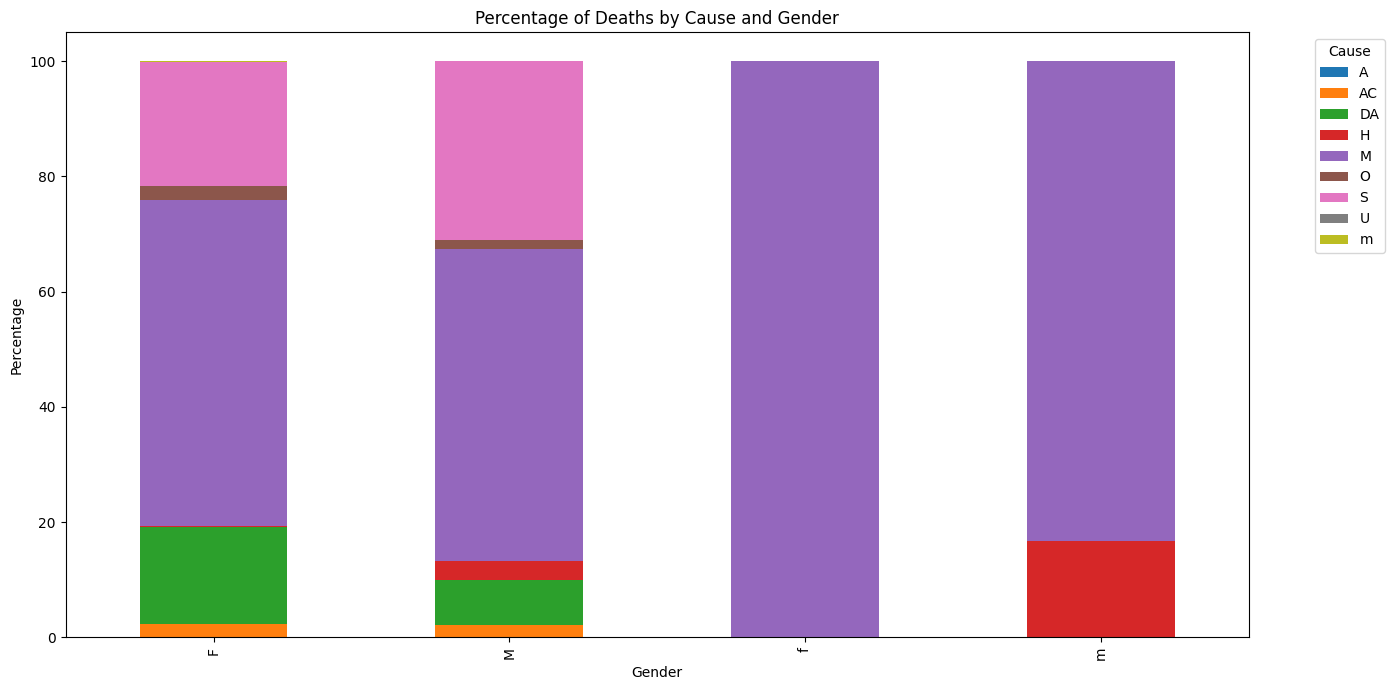

In [270]:
cause_gender_counts = df.groupby(['gender', 'cause_short']).size().unstack(fill_value=0)
total_deaths_per_gender = cause_gender_counts.sum(axis=1)
percentage_cause_gender = cause_gender_counts.divide(total_deaths_per_gender, axis=0) * 100

plt.figure(figsize=(14, 8))
percentage_cause_gender.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Percentage of Deaths by Cause and Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The stacked bar chart above breaks down the causes of death by gender. Both male and female deaths are dominated by medical causes, represented by the purple bars, followed by suicides. However, there is a noticeable difference in the distribution of other causes. For example, the green bar representing "Homicide" (H) is more prominent among men than women, indicating that men are more likely to die from violence within jail settings. However, drug and alcohol deaths are more common in women, meaning substance abuse is very prevalent among women.

These charts suggest that while the overall number of deaths is heavily skewed towards men, the causes of death are somewhat similar across genders, with medical issues and suicide being the leading causes. However, the presence of violence-related deaths among men points to potential issues with jail security and the need for better mental health support.

## Deaths by Race
Let us explore deaths by race for further analysis.

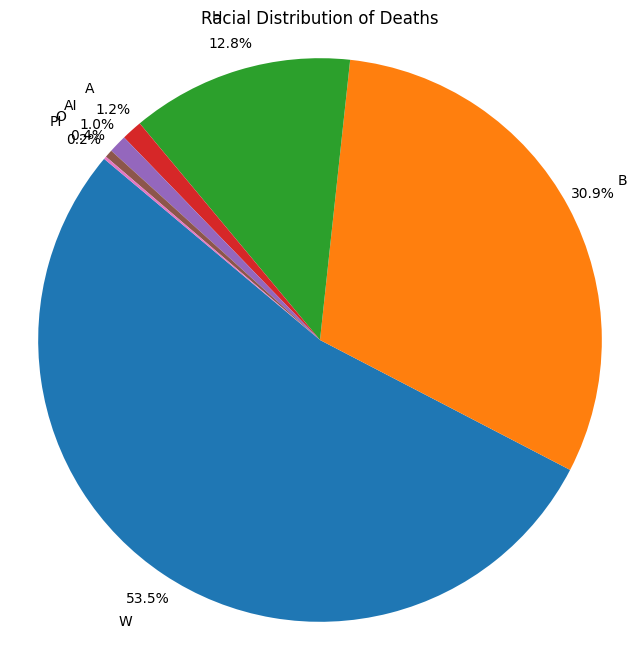

In [271]:
racial_counts = df['race'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    racial_counts,
    labels=racial_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=1.1,
    labeldistance=1.2
)
plt.title('Racial Distribution of Deaths')
plt.axis('equal')
plt.show()

According to the data, White individuals account for the highest percentage of jail deaths at 53.5%, followed by Black individuals at 30.9%. Hispanic individuals constitute 12.8% of the deaths, while other racial groups such as Asian, American Indian, and Pacific Islander make up smaller percentages. This distribution underscores the disproportionate impact of jail deaths on White and Black populations, suggesting potential underlying systemic issues that require further investigation.

<Figure size 1400x800 with 0 Axes>

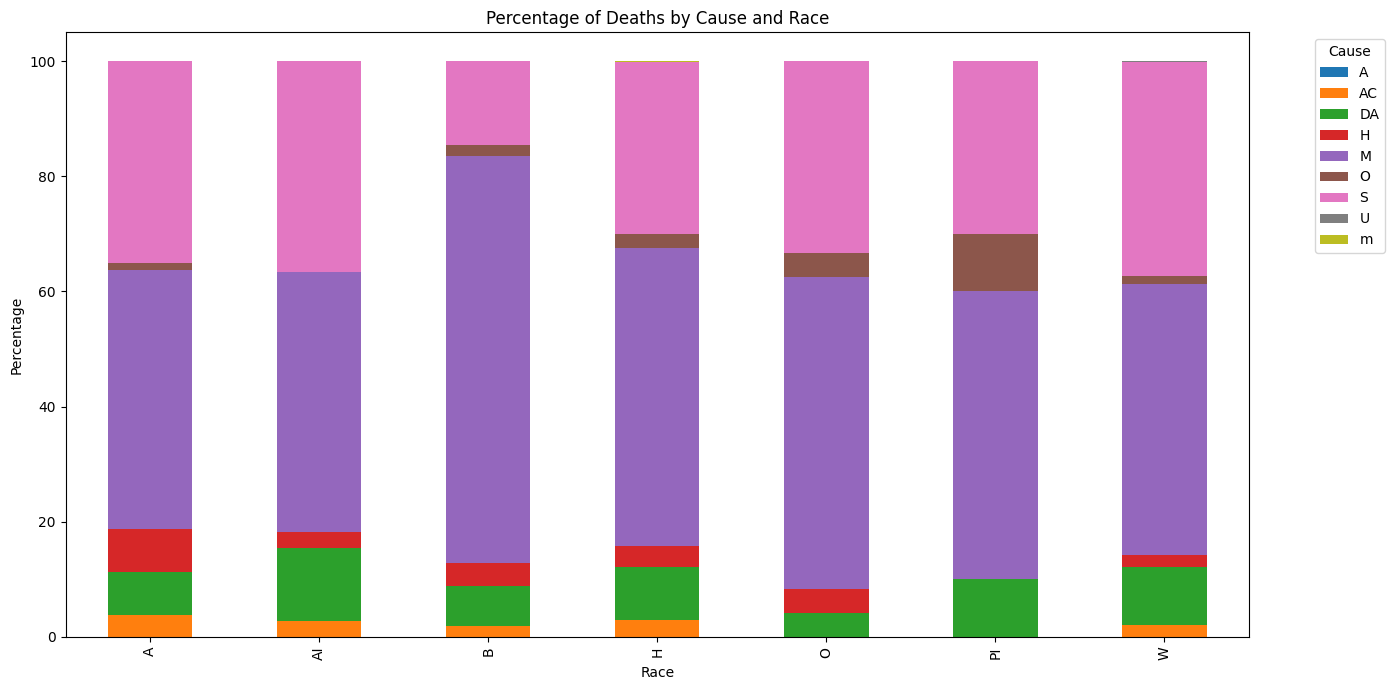

In [272]:
cause_race_counts = df.groupby(['race', 'cause_short']).size().unstack(fill_value=0)

total_deaths_per_race = cause_race_counts.sum(axis=1)

percentage_cause_race = cause_race_counts.divide(total_deaths_per_race, axis=0) * 100

plt.figure(figsize=(14, 8))
percentage_cause_race.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Percentage of Deaths by Cause and Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

When examining the causes of death, Suicide and Medical issues are the predominant factors across all racial groups, highlighting critical areas for intervention, such as enhanced mental health services and medical care within jails. The bar chart further illustrates these trends, showing that Medical is consistently the leading cause of death, followed by Suicide causes. Black people have a high percentage of deaths due to medical reasons compared to the other races. American Indians have a slightly higher percentage of deaths related to Drug/Alcohol causes. These disparities indicate the need for tailored strategies to address the specific health and safety challenges faced by different racial groups, ultimately aiming to reduce the overall number of jail deaths and improve conditions for all incarcerated individuals.

## Deaths by Custody Status

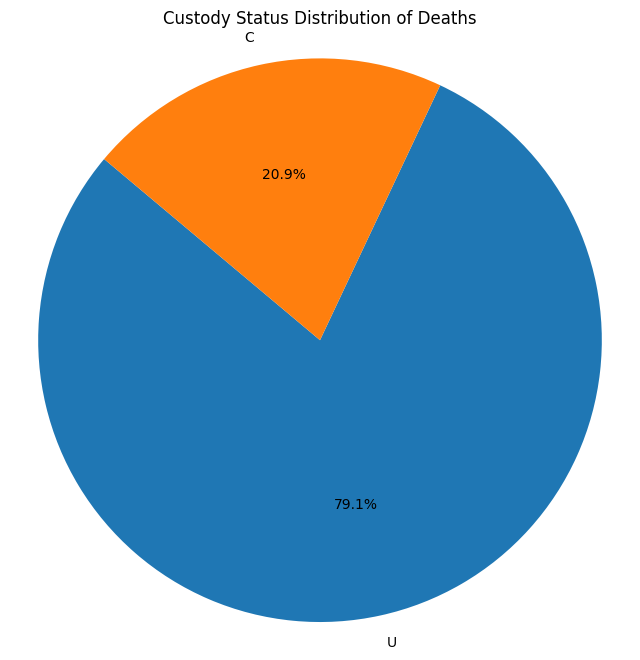

In [273]:
custody_counts = df['custody_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(custody_counts, labels=custody_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Custody Status Distribution of Deaths')
plt.axis('equal')
plt.show()

The pie chart indicates that a substantial majority (79.1%) of deaths occur out-of-custody, while only 20.9% occur in-custody. This suggests a heightened risk for individuals during the transition periods immediately before or after custody, underscoring the need for enhanced support and intervention during these critical times.

<Figure size 1400x800 with 0 Axes>

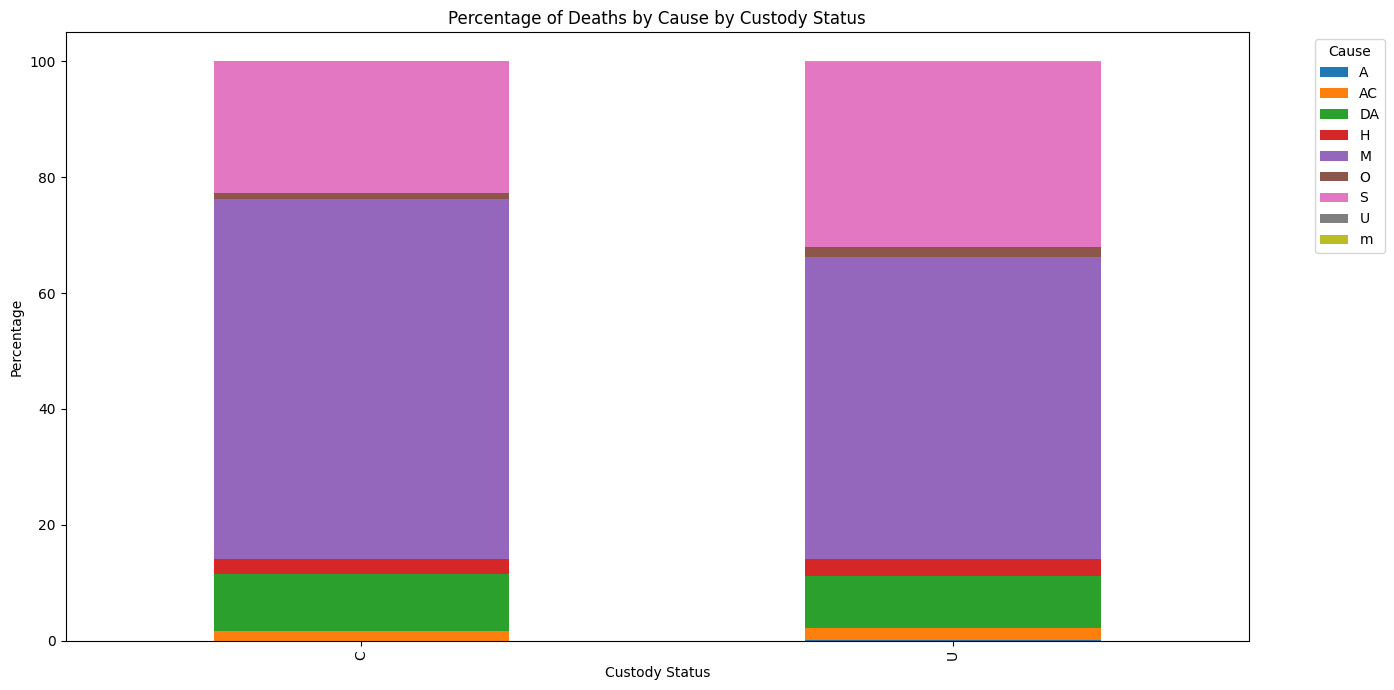

In [274]:
cause_custody_counts = df.groupby(['custody_status', 'cause_short']).size().unstack(fill_value=0)

total_deaths_per_state = cause_custody_counts.sum(axis=1)

percentage_cause_state = cause_custody_counts.divide(total_deaths_per_state, axis=0) * 100

plt.figure(figsize=(14, 8))
percentage_cause_state.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Percentage of Deaths by Cause by Custody Status')
plt.xlabel('Custody Status')
plt.ylabel('Percentage')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The stacked bar chart further elaborates on the causes of these deaths, showing that medical issues and suicides are predominant in both in-custody and out-of-custody situations. The slightly higher percentage of medical-related deaths in custody highlights the urgent need for improved healthcare services within jails. Additionally, the notable presence of drug/alcohol-related deaths in both categories indicates ongoing substance abuse problems, suggesting that comprehensive addiction treatment and support services are crucial. Although homicides represent a smaller proportion of deaths, their occurrence in both groups underscores the importance of addressing violence and safety concerns for individuals both within the custody system and in the general population.

These findings point to the necessity for media coverage that not only focuses on high-profile incidents or systemic failures within jails but also highlights the broader patterns of deaths occurring out-of-custody. By bringing attention to the underlying health, mental health, and substance abuse issues affecting individuals associated with the criminal justice system, media can play a pivotal role in advocating for systemic reforms and improved support services. Comprehensive reporting on these issues is essential for raising awareness and driving meaningful change to address the disparities in jail-related deaths in the United States.

## Death by Age

In [ ]:
df = df.dropna(subset=['age'])

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Distribution of Ages at Death')
plt.grid(True)
plt.show()

The chart above, depicting the distribution of ages at death, shows a concentration of deaths among individuals between the ages of 15 and 95. The highest number of deaths occurs between ages 40 and 60, with a noticeable peak in the late-40s. This suggests that middle-aged individuals in jails are particularly vulnerable, which may be due to a combination of factors, including underlying health issues, stress, and inadequate medical care.

In [ ]:
cause_age_counts = df.groupby(['age', 'cause_short']).size().unstack(fill_value=0)

total_deaths_per_age = cause_age_counts.sum(axis=1)

percentage_cause_age = cause_age_counts.divide(total_deaths_per_age, axis=0) * 100

plt.figure(figsize=(14, 8))
percentage_cause_age.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Percentage of Deaths by Cause and Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This chart breaks down the percentage of deaths by cause and age, highlights significant disparities in the causes of death across different age groups. For younger individuals (ages 15-30), deaths are more likely to result from suicide (S) and drug/alcohol-related causes (DA). As age increases, deaths due to natural and medical causes become more prevalent, particularly from the age of 40 onwards. This shift indicates a transition from external, preventable causes in younger populations to more chronic health conditions in older inmates.

Interestingly, while suicides and drug/alcohol-related deaths dominate the younger age groups, these causes decline sharply as inmates age. By the time individuals reach their 50s and beyond, the overwhelming majority of deaths are due to health-related issues. This trend underscores the importance of targeted interventions for younger inmates, particularly in mental health and substance abuse, to potentially prevent a significant proportion of these deaths.

Moreover, the charts suggest a disparity in the overall age distribution of deaths, with relatively few deaths occurring in inmates over the age of 60. This could reflect either a smaller population of older inmates or better survival rates among this group. However, the near-absence of deaths beyond the age of 80, with the exception of a few cases, suggests that few individuals survive to this age in jail, either due to earlier deaths or release from custody before reaching advanced age.

## Media Coverage of Jail Deaths

When covering jail deaths, the media showcases information that provides valuable insights into how these events are represented in the public discourse. Using nltk, a bar chart showing the most common words is shown below.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

df = df.dropna(subset=['what_info_from_media'])

def clean_tokenize(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

df['tokens'] = df['what_info_from_media'].apply(clean_tokenize)

all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

freq_df = pd.DataFrame(freq_dist.most_common(30), columns=['Word', 'Frequency'])

plt.figure(figsize=(15, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Media Coverage of Jail Deaths')
plt.xticks(rotation=45)
plt.show()

The chart illustrates that the most frequently reported details in media coverage of jail deaths are "age," "media," "name," and "date." This suggests that media reports tend to prioritize basic biographical and temporal information about the individuals who die in custody. The prominence of "age" as the most common data point shared aligns with the need to humanize the deceased by providing demographic context, which is essential for understanding the life stage at which individuals are dying while in jail. However, this focus may also overshadow more nuanced discussions about the systemic issues contributing to these deaths.

The high frequency of "custody status" and "cause" in media reports suggests that coverage often includes the legal circumstances surrounding the individual's death and the immediate cause. This could indicate that the media is focused on whether the deceased was awaiting trial, had been sentenced, or was otherwise involved in the legal process at the time of their death. By reporting on the "cause" of death, the media likely provides information on whether the death was due to suicide, illness, or another factor, which is crucial for public understanding of the nature of these deaths. However, while this data is critical, it may not delve into the underlying conditions that lead to these causes, such as mental health issues, poor medical care, or violence within jails.

The inclusion of "incarceration date" and "gender" further suggests that media reports often provide a timeline and demographic profile of the deceased, which helps to build a narrative around the individual’s experience within the jail system. However, less emphasis on data points such as "conviction" and "arrest" may indicate that the media does not always fully explore the broader legal context of the individual's incarceration, which could be vital for understanding the pathways that lead to their deaths.

Interestingly, terms related to official actions or responses, such as "lawsuit" and "report," are less commonly mentioned, implying that while these deaths are reported, the media might not always follow up on or emphasize the accountability processes that could arise from these incidents. This could suggest a gap in the coverage where the focus is on the incident itself rather than the aftermath or systemic reforms.

In relation to the research question, the chart reveals a disparity in the depth of media coverage on jail deaths. While basic demographic and situational information is frequently shared, there appears to be less emphasis on systemic issues or the long-term implications of these deaths. This indicates that the media may not be fully capturing the broader patterns and disparities in jail deaths, potentially limiting public understanding and the impetus for systemic change.

# Conclusion
The analysis of jail deaths in the United States reveals a complex and troubling landscape marked by significant patterns and disparities across various demographic and situational factors. The upward trend in the number of jail deaths from 2008 to 2019, driven predominantly by medical issues and suicides, underscores the urgent need for improved healthcare and mental health support within the criminal justice system. The data indicates that systemic neglect, inadequate medical care, and insufficient mental health resources are critical areas requiring immediate attention. The findings align with the observations of the Equal Justice Initiative, which highlights the severe shortcomings in prison healthcare, particularly for the aging incarcerated population, and calls for a shift towards more humane and rehabilitative approaches.

The disparities in jail deaths by gender, race, age, and custody status further highlight the multifaceted nature of this issue. Men are disproportionately affected, but women, despite being a smaller percentage of the jail population, experience a higher rate of deaths relative to their numbers, particularly from drug and alcohol-related causes. Racial disparities show that White and Black individuals account for the majority of jail deaths, with distinct causes of death suggesting different underlying issues affecting each group. The high incidence of deaths among middle-aged inmates points to the compounded impact of chronic health conditions and the stresses of incarceration. The critical periods surrounding custody transitions, where a significant number of deaths occur, indicate a need for better support systems during these vulnerable times.

Media coverage of jail deaths, as analyzed through the most common words used in reporting, reveals a focus on basic demographic and situational details but often lacks depth in exploring systemic issues or the long-term implications of these deaths. This gap in coverage can limit public understanding and the drive for meaningful reforms. For comprehensive policy-making and public discourse, it is essential that media reports not only highlight individual incidents but also provide context about the systemic failures contributing to these deaths. Enhanced media reporting on the underlying causes and systemic issues can play a crucial role in advocating for reforms that address the root problems within the jail system.

In conclusion, the study emphasizes the need for systemic reform to address the patterns and disparities in jail deaths. Improvements in healthcare, mental health support, and substance abuse treatment within jails are paramount. Additionally, a more nuanced and in-depth media portrayal of these deaths is crucial to inform public discourse and drive policy changes. By understanding and addressing the complex factors contributing to jail deaths, society can take significant steps towards protecting the most vulnerable and ensuring justice and dignity for all individuals within the criminal justice system.